# Example of a Verification

In this notebook, we show how to build and verify a solution for the CGSHOP 2026 challenge using the `cgshop2026_pyutils` library.

## Building the Instance

Our instance will consist of three triangulations. The points are just two points in the middle of a rectangle.

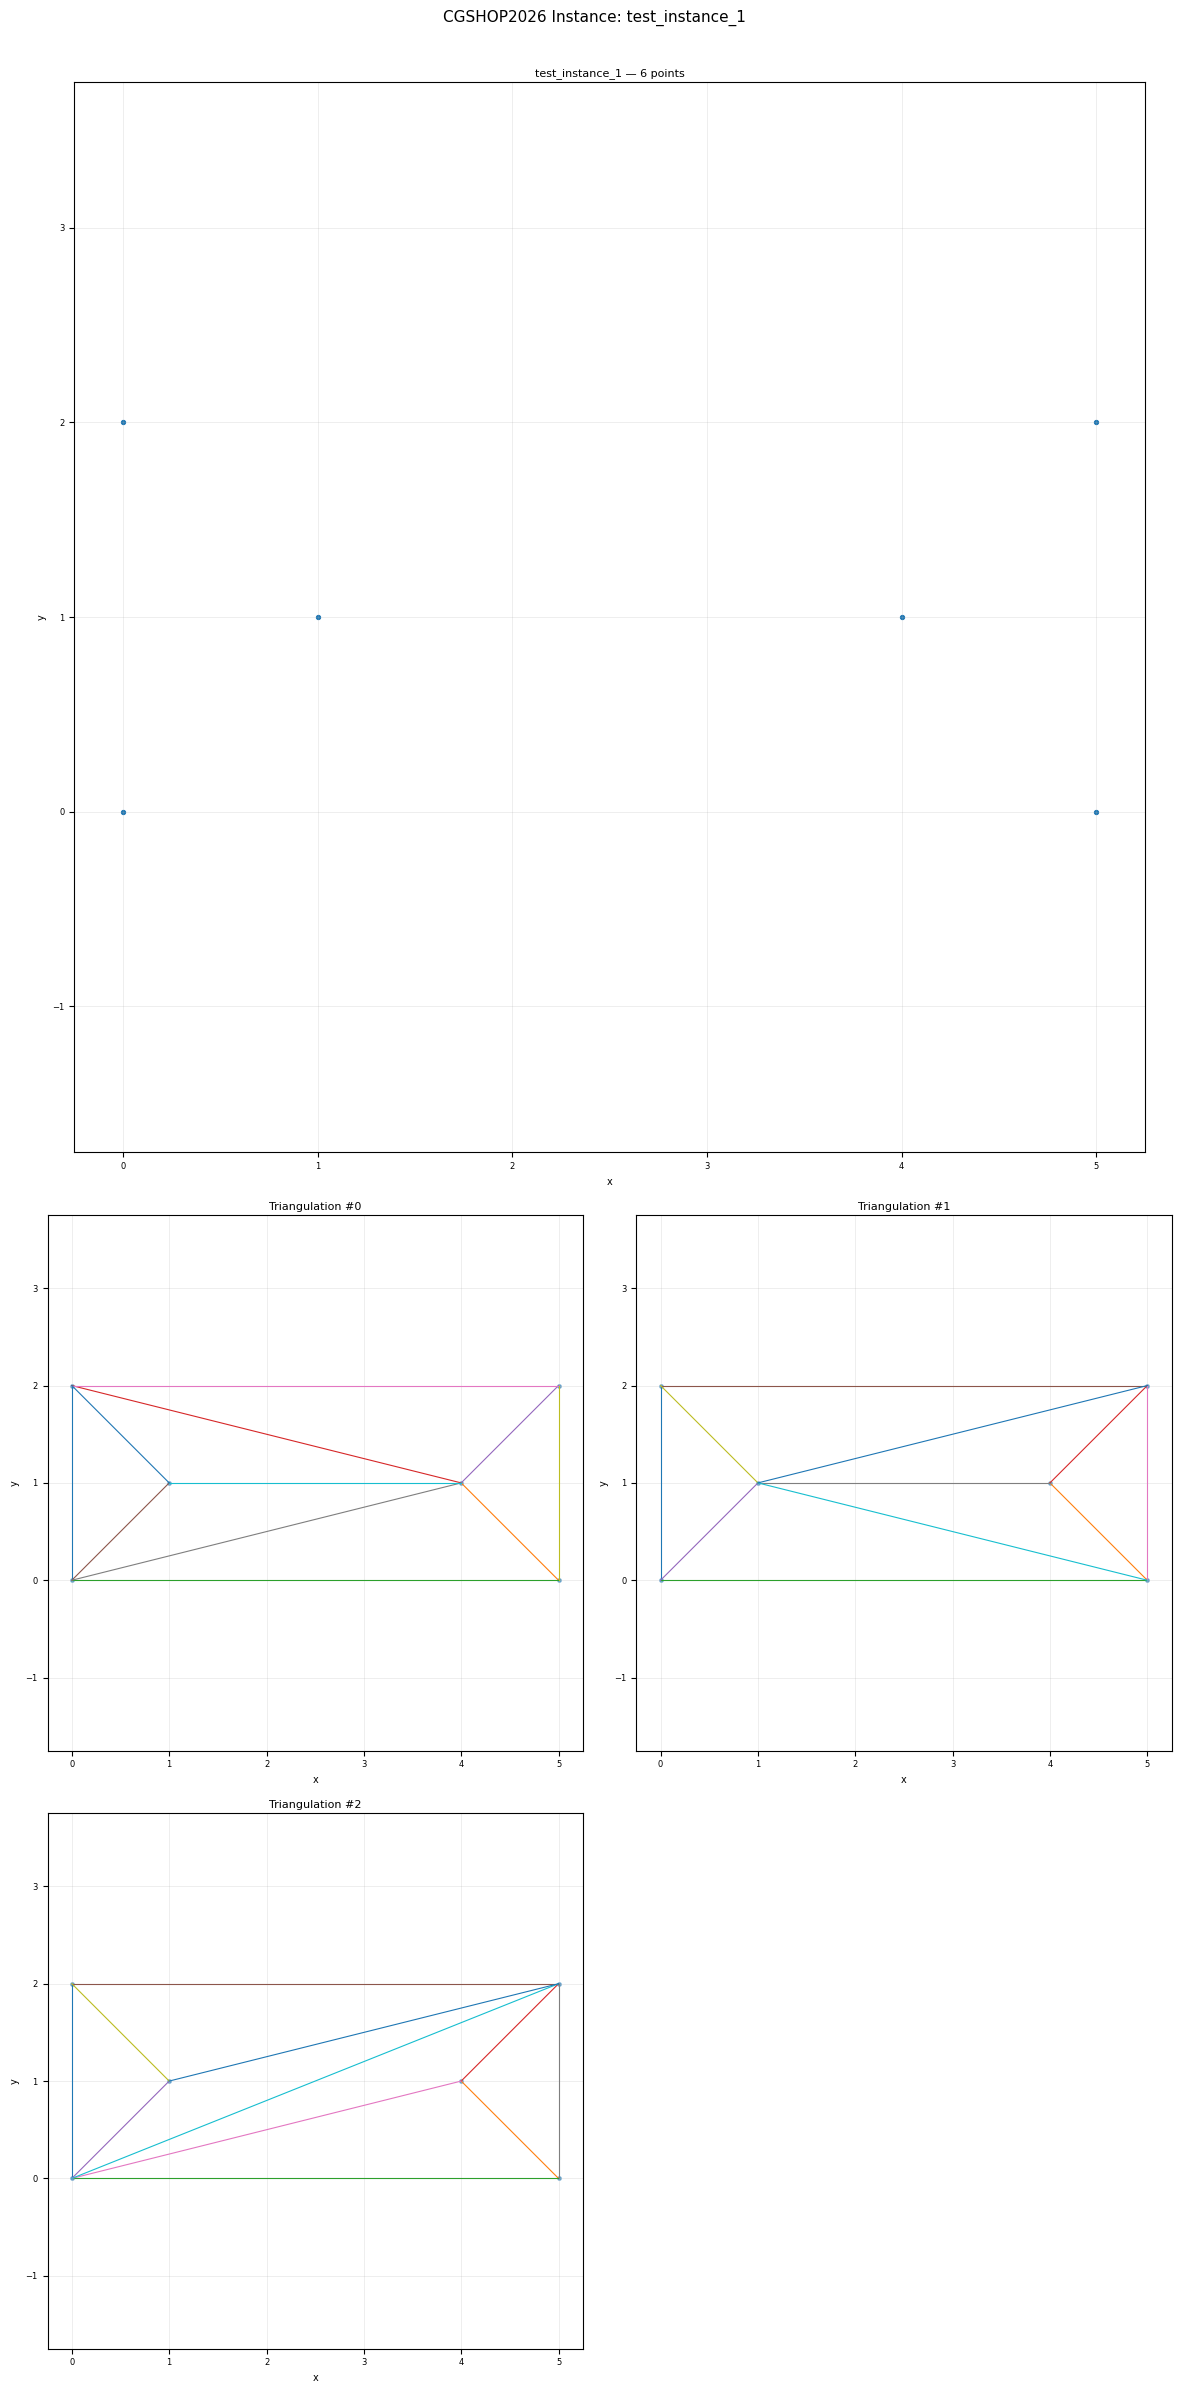

In [68]:
from matplotlib import pyplot as plt
from cgshop2026_pyutils.geometry import (
    FlippableTriangulation,
    draw_flips,
    Point,
    expand_edges_by_convex_hull_edges,
    is_triangulation,
)
from cgshop2026_pyutils.schemas import CGSHOP2026Instance, CGSHOP2026Solution
from cgshop2026_pyutils.verify import check_for_errors
from cgshop2026_pyutils.visualize import create_instance_plot

points = [((0, 2)), (0, 0), (5, 0), (5, 2), (4, 1), (1, 1)]
points_ = [Point(x, y) for x, y in points]
triang_1 = [(0, 5), (0, 4), (1, 4), (1, 5), (2, 4), (3, 4), (4, 5)]
triang_1 = expand_edges_by_convex_hull_edges(points_, triang_1)
triang_2 = [(0, 5), (1, 5), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
triang_2 = expand_edges_by_convex_hull_edges(points_, triang_2)
triang_3 = [(0, 5), (1, 4), (1, 5), (1, 3), (2, 4), (3, 4), (3, 5)]
triang_3 = expand_edges_by_convex_hull_edges(points_, triang_3)
instance = CGSHOP2026Instance(
    instance_uid="test_instance_1",
    points_x=[x for x, y in points],
    points_y=[y for x, y in points],
    triangulations=[triang_1, triang_2, triang_3],
)
for triang in instance.triangulations:
    points = [Point(x, y) for x, y in zip(instance.points_x, instance.points_y)]
    assert is_triangulation(points, triang, verbose=False), (
        f"Triangulation {triang} is not valid for the given points."
    )

create_instance_plot(instance)
plt.show()

## Triangulation 1

Let us first create a mutable triangulation from the first triangulation and visualize it. We will be lazy and flip both other triangulations to this one. Thus, we do not perform any flips here.

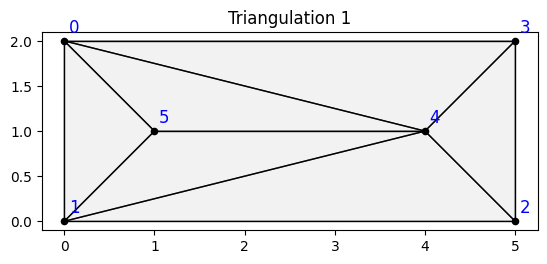

In [69]:
flippable_triang_1 = FlippableTriangulation.from_points_edges(
    [Point(x, y) for x, y in points], triang_1
)
draw_flips(flippable_triang_1, show_indices=True, title="Triangulation 1")

## Triangulation 2

Similarly, we can create and visualize the second triangulation.

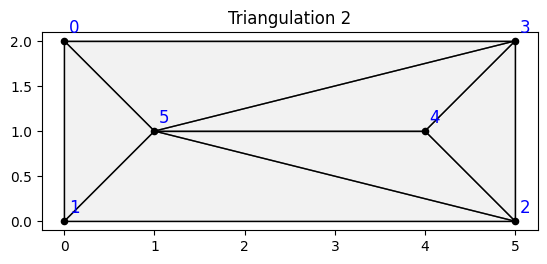

In [70]:
flippable_triang_2 = FlippableTriangulation.from_points_edges(
    [Point(x, y) for x, y in points], triang_2
)
draw_flips(flippable_triang_2, show_indices=True, title="Triangulation 2")

## Triangulation 3

Finally, we create and visualize the third triangulation.

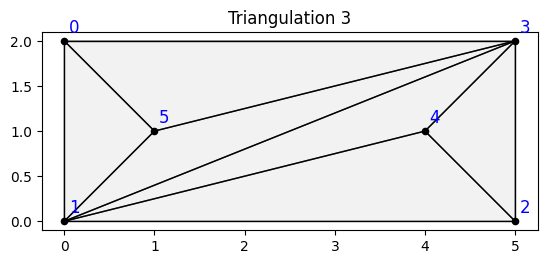

In [71]:
flippable_triang_3 = FlippableTriangulation.from_points_edges(
    [Point(x, y) for x, y in points], triang_3
)
draw_flips(flippable_triang_3, show_indices=True, title="Triangulation 3")

## Flipping the second Triangulation to the first Triangulation

We can flip the second triangulation to the first triangulation with one parallel flip step.

In the beginning, we have the following feasible flips: [(2, 5), (3, 5)]
Executing the first flip: (3, 5)
After adding the first flip, we have the following feasible flips: [(2, 5)]
Executing the second flip: (2, 5)
After adding the second flip, we have the following feasible flips: []


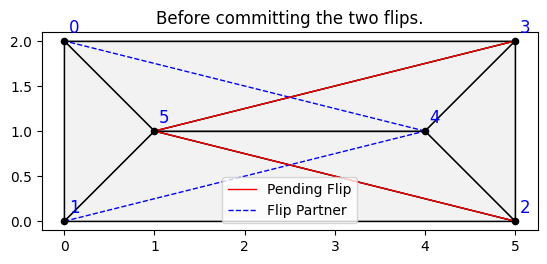

Committing the parallel flip step.


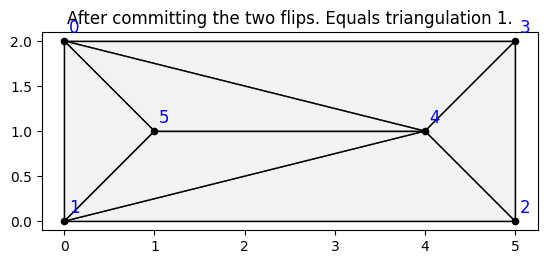

After committing the parallel flip step, we have the following feasible flips: [(0, 4), (1, 4)]


In [72]:
print(
    "In the beginning, we have the following feasible flips:",
    flippable_triang_2.possible_flips(),
)

# Add the first flip
flip_1 = (3, 5)
print(f"Executing the first flip: {flip_1}")
flippable_triang_2.add_flip(flip_1)
print(
    "After adding the first flip, we have the following feasible flips:",
    flippable_triang_2.possible_flips(),
)

# Add the second flip
flip_2 = (2, 5)
print(f"Executing the second flip: {flip_2}")
flippable_triang_2.add_flip(flip_2)
print(
    "After adding the second flip, we have the following feasible flips:",
    flippable_triang_2.possible_flips(),
)

# Visualize before committing the flips
draw_flips(
    flippable_triang_2, show_indices=True, title="Before committing the two flips."
)
plt.show()

# Commit the flips
print("Committing the parallel flip step.")
flippable_triang_2.commit()

# Visualize after committing the flips
draw_flips(
    flippable_triang_2,
    show_indices=True,
    title="After committing the two flips. Equals triangulation 1.",
)
plt.show()

print(
    "After committing the parallel flip step, we have the following feasible flips:",
    flippable_triang_2.possible_flips(),
)

# Verify that the second triangulation is now equal to the first triangulation
assert flippable_triang_1 == flippable_triang_2

## Flipping the third Triangulation to the first Triangulation

We can flip the third triangulation to the first triangulation with two parallel flip steps.

Initially, we have the following feasible flips: [(1, 3)]
Executing the first flip: (1, 3)
After adding the first flip, we have the following feasible flips: []


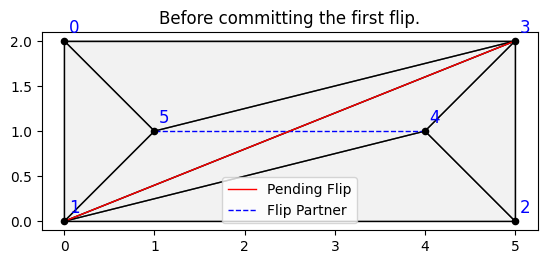

Committing the first flip.


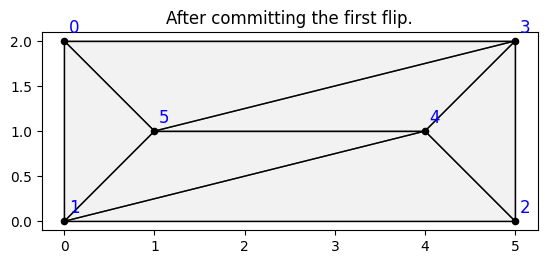

After committing the first flip, we have the following feasible flips: [(4, 5), (1, 4), (3, 5)]
Executing the second flip: (3, 5)
After adding the second flip, we have the following feasible flips: [(1, 4)]


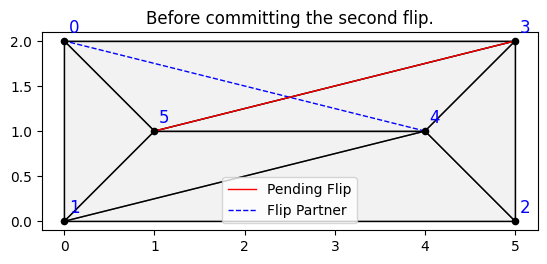

Committing the second flip.


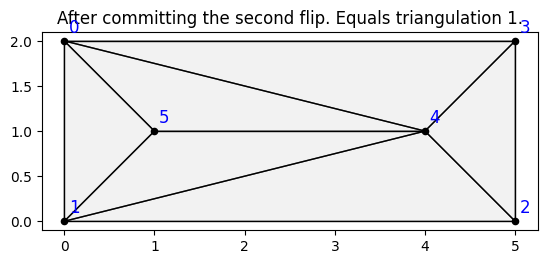

After committing the second flip, we have the following feasible flips: [(1, 4), (0, 4)]


In [73]:
print(
    "Initially, we have the following feasible flips:",
    flippable_triang_3.possible_flips(),
)

# Add the first flip
flip_1 = (1, 3)
print(f"Executing the first flip: {flip_1}")
flippable_triang_3.add_flip(flip_1)
print(
    "After adding the first flip, we have the following feasible flips:",
    flippable_triang_3.possible_flips(),
)

# Visualize before committing the first flip
draw_flips(
    flippable_triang_3, show_indices=True, title="Before committing the first flip."
)
plt.show()

# Commit the first flip
print("Committing the first flip.")
flippable_triang_3.commit()

# Visualize after committing the first flip
draw_flips(
    flippable_triang_3, show_indices=True, title="After committing the first flip."
)
plt.show()

print(
    "After committing the first flip, we have the following feasible flips:",
    flippable_triang_3.possible_flips(),
)

# Add the second flip
flip_2 = (3, 5)
print(f"Executing the second flip: {flip_2}")
flippable_triang_3.add_flip(flip_2)
print(
    "After adding the second flip, we have the following feasible flips:",
    flippable_triang_3.possible_flips(),
)

# Visualize before committing the second flip
draw_flips(
    flippable_triang_3, show_indices=True, title="Before committing the second flip."
)
plt.show()

# Commit the second flip
print("Committing the second flip.")
flippable_triang_3.commit()

# Visualize after committing the second flip
draw_flips(
    flippable_triang_3,
    show_indices=True,
    title="After committing the second flip. Equals triangulation 1.",
)
plt.show()

print(
    "After committing the second flip, we have the following feasible flips:",
    flippable_triang_3.possible_flips(),
)

# Verify that the third triangulation is now equal to the first triangulation
assert flippable_triang_1 == flippable_triang_3

## Verify the Solution

We can now write the solution and verify that all triangulations are valid for the given points.

In [74]:
flips_1 = []
flips_2 = [[(3, 5), (2, 5)]]
flips_3 = [[(1, 3)], [(3, 5)]]
solution = CGSHOP2026Solution(
    instance_uid="test_instance_1", flips=[flips_1, flips_2, flips_3]
)
errors = check_for_errors(instance, solution)
assert not errors, f"Errors found in solution: {errors}"